# FRIENDS QUOTES IDENTIFIER

In [325]:
import pandas as pd
import seaborn as sns
import numpy as np
import spacy 
from sklearn.feature_extraction.text import CountVectorizer
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LogisticRegression

In [326]:
friends = pd.read_csv("friends_quotes.csv")

In [327]:
friends

,author,episode_number,episode_title,quote,quote_order,season
0,Monica,1.0,Monica Gets A Roommate,There's nothing to tell! He's just some guy I ...,0.0,1.0
1,Joey,1.0,Monica Gets A Roommate,"C'mon, you're going out with the guy! There's ...",1.0,1.0
2,Chandler,1.0,Monica Gets A Roommate,"All right Joey, be nice. So does he have a hum...",2.0,1.0
3,Phoebe,1.0,Monica Gets A Roommate,"Wait, does he eat chalk?",3.0,1.0
4,Phoebe,1.0,Monica Gets A Roommate,"Just, 'cause, I don't want her to go through w...",4.0,1.0
...,...,...,...,...,...,...
60286,Chandler,17.0,"The Last One, Part I & II","Oh, it's gonna be okay.",581.0,10.0
60287,Rachel,17.0,"The Last One, Part I & II",(crying) Do you guys have to go to the new hou...,582.0,10.0
60288,Monica,17.0,"The Last One, Part I & II",We got some time.,583.0,10.0
60289,Rachel,17.0,"The Last One, Part I & II","Okay, should we get some coffee?",584.0,10.0


In [328]:
friends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60291 entries, 0 to 60290
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   author          60291 non-null  object 
 1   episode_number  60291 non-null  float64
 2   episode_title   60291 non-null  object 
 3   quote           60291 non-null  object 
 4   quote_order     60291 non-null  float64
 5   season          60291 non-null  float64
dtypes: float64(3), object(3)
memory usage: 2.8+ MB


In [329]:
main_characters = ["Monica", "Joey", "Phoebe", "Ross", "Chandler", "Rachel"] 
#escogemos a los actores principales (que son los que nos interesan)

<AxesSubplot:xlabel='author', ylabel='count'>

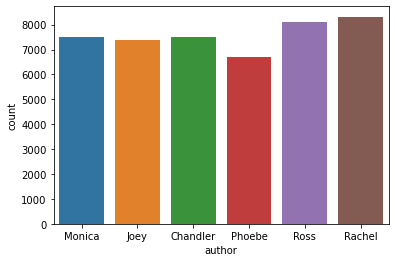

In [330]:
sns.countplot(x='author', data=friends[friends.author.isin(main_characters)])

In [331]:
friends[friends.season == 1]["quote"][0:80]

0     There's nothing to tell! He's just some guy I ...
1     C'mon, you're going out with the guy! There's ...
2     All right Joey, be nice. So does he have a hum...
3                              Wait, does he eat chalk?
4     Just, 'cause, I don't want her to go through w...
                            ...                        
75                     Oh God, is it 6:30? Buzz him in!
76                                          Who's Paul?
77                             Paul the Wine Guy, Paul?
78    Maybe. Joey: Wait. Your 'not a real date' toni...
79                            He finally asked you out?
Name: quote, Length: 80, dtype: object

In [332]:
friends_1_8 = friends[friends.season.isin([1,2,3,4,5,6,7,8]) & friends.author.isin(main_characters)].drop(columns=['episode_number', 'episode_title', "quote_order", "season"])
friends_1_8 #dataset para trabajar 

,author,quote
0,Monica,There's nothing to tell! He's just some guy I ...
1,Joey,"C'mon, you're going out with the guy! There's ..."
2,Chandler,"All right Joey, be nice. So does he have a hum..."
3,Phoebe,"Wait, does he eat chalk?"
4,Phoebe,"Just, 'cause, I don't want her to go through w..."
...,...,...
48950,Joey,Sure.
48951,Rachel,Okay.
48952,Joey,My God.
48953,Rachel,Joey.


In [333]:
friends_1_8.shape

(36382, 2)

In [334]:
friends_9_10 = friends[friends.season.isin([9,10]) & friends.author.isin(main_characters)].drop(columns=['episode_number', 'episode_title', "quote_order", "season"])
friends_9_10 #Dataset para testear 

,author,quote
48956,Rachel,Joey.
48957,Rachel,(seeing the ring) Oh my God. (Pause) Okay.
48958,Rachel,So uh I guess we should make it official huh?
48959,Joey,Uh Look Rach (Ross enters.) Hey Ross is here!...
48960,Ross,Hey Joey. (To Rachel) Hey you.
...,...,...
60286,Chandler,"Oh, it's gonna be okay."
60287,Rachel,(crying) Do you guys have to go to the new hou...
60288,Monica,We got some time.
60289,Rachel,"Okay, should we get some coffee?"


In [335]:
friends_9_10.shape

(9100, 2)

In [336]:
friends_9_10.reset_index(drop = True, inplace = True)

## Creamos una columna con la información de los paréntesis (not useful)

In [337]:
friends_1_8.reset_index(drop = True, inplace = True)

In [338]:
print(friends_1_8["quote"][36381])

(seeing the ring) Oh my God. (Pause) Okay.


In [339]:
reactions = friends_1_8["quote"].str.findall("\(([^)]+)\)")

In [340]:
reactions[36381]

['seeing the ring', 'Pause']

In [341]:
friends_1_8.head(20)

,author,quote
0,Monica,There's nothing to tell! He's just some guy I ...
1,Joey,"C'mon, you're going out with the guy! There's ..."
2,Chandler,"All right Joey, be nice. So does he have a hum..."
3,Phoebe,"Wait, does he eat chalk?"
4,Phoebe,"Just, 'cause, I don't want her to go through w..."
5,Monica,"Okay, everybody relax. This is not even a date..."
6,Chandler,Sounds like a date to me.
7,Chandler,"Alright, so I'm back in high school, I'm stand..."
8,Chandler,"Then I look down, and I realize there's a phon..."
9,Joey,Instead of...?


In [342]:
print(friends_1_8["quote"][16])

(mortified) Hi.


In [343]:
print(reactions[3691])

['on phone', 'Listens', 'Listens', 'Listens', 'Listens', 'Listens', 'Listens', 'Listens', 'Listens', 'Listens', 'Listens', 'Listens', 'Listens', 'Hangs up and sits down heavily.']


In [344]:
x =[]
for i,z in zip(reactions,range(len((reactions)))):
        x.append(( i,len(i),reactions.index[z]))
print(x)

[([], 0, 0), ([], 0, 1), ([], 0, 2), ([], 0, 3), ([], 0, 4), ([], 0, 5), ([], 0, 6), ([], 0, 7), ([], 0, 8), ([], 0, 9), ([], 0, 10), ([], 0, 11), ([], 0, 12), ([], 0, 13), ([], 0, 14), ([], 0, 15), (['mortified'], 1, 16), ([], 0, 17), ([], 0, 18), ([], 0, 19), ([], 0, 20), (['explaining to the others'], 1, 21), ([], 0, 22), (['to Ross'], 1, 23), ([], 0, 24), (['She starts to pluck at the air just in front of Ross.'], 1, 25), ([], 0, 26), ([], 0, 27), ([], 0, 28), ([], 0, 29), ([], 0, 30), ([], 0, 31), ([], 0, 32), (['They all stare at him.'], 1, 33), ([], 0, 34), ([], 0, 35), ([], 0, 36), ([], 0, 37), ([], 0, 38), ([], 0, 39), (['He extends his hand hopefully.'], 1, 40), ([], 0, 41), ([], 0, 42), (['pointing at Rachel', 'to All', 'to Rachel'], 3, 43), ([], 0, 44), ([], 0, 45), ([], 0, 46), (['to the waitress that brought her coffee', 'to Monica'], 2, 47), ([], 0, 48), ([], 0, 49), ([], 0, 50), (['imitating the characters'], 1, 51), (['in a deep voice'], 1, 52), (['on phone'], 1, 53), 

In [345]:
sorted_by_second = sorted(x, key=lambda tup: tup[1],reverse=True)
print(sorted_by_second )

[(['on phone', 'Listens', 'Listens', 'Listens', 'Listens', 'Listens', 'Listens', 'Listens', 'Listens', 'Listens', 'Listens', 'Listens', 'Listens', 'Hangs up and sits down heavily.'], 14, 3691), (['on the phone', 'Listens', 'Listens and laughs', 'Rachel turns around and glares at him.', 'Listens', 'turns and sees Rachel staring at him and quickly changes the subject', 'Listens', 'Listens', 'Listens', 'Listens', 'Listens', 'Rachel gets excited at his tone.', 'Hangs up the phone'], 13, 20121), (['The phone rings and he answers it', 'On phone', 'Takes the phone away from his mouth when he realizes what he just did and yells.', 'Back on phone.', 'Listens.', 'Listens', 'Listens', 'Listens', 'Hangs up and goes to write the message on the Magna-Doodle.', 'Reading what he\x92s writing', 'Pause'], 11, 24719), (['on phone', 'Listens', 'To Phoebe and Rachel', 'On phone', 'Listens', 'Listens', 'Listens', 'Listens', 'Listens', 'Listens', 'Hangs up'], 11, 26668), (['on phone', 'Listens', 'Listens', '

In [346]:
friends_1_8["quote"][3691]

"(on phone) Hello?(Listens) Mindy! Hi! Hey, how are you? (Listens) Yes, yes, I've heard, congratulations, that is so great. (Listens) Really? (Listens) Oh. (Listens) Okay. Okay, well I'm working tomorrow, but if you want you can, you can, you can come by and... (Listens) Okay... (Listens) Great... (Listens) Great... (Listens) All right, so I'll, so I'll see you tomorrow! (Listens) Okay.. (Listens) Okay... (Listens) Bye. (Hangs up and sits down heavily.) Oh God. Oh God. Oh God."

In [347]:
friends_1_8["quote"][20121]

"(on the phone) Yes, hello. I have a question. Umm, I used your pen to draw on my friend's face. (Listens) A beard and a moustache. (Listens and laughs) Thank you. (Rachel turns around and glares at him.) No, she didn't think so. (Listens) I know it's like (turns and sees Rachel staring at him and quickly changes the subject) anyway, umm well make-up didn't cover it and we've tried everything to get it off and nothing's worked. What-what do we do? (Listens) Yeah. (Listens) Uh-huh. (Listens) Yeah. (Listens) Oh! Okay. (Listens) Okay, thank you! (Rachel gets excited at his tone.) (Hangs up the phone) Yeah, it's not coming off."

In [348]:
reactions_split = pd.DataFrame(reactions.to_list(), columns=[1,2,3,4,5,6,7,8,9,10,11,12,13,14])
reactions_split

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,None,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36377,None,None,None,None,None,None,None,None,None,None,None,None,None,None
36378,None,None,None,None,None,None,None,None,None,None,None,None,None,None
36379,None,None,None,None,None,None,None,None,None,None,None,None,None,None
36380,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [349]:
reactions_split.replace("([L|l]istens)","", regex=True, inplace = True)

In [350]:
reactions_split[1].unique()

array([None, 'mortified', 'explaining to the others', ...,
       'Silence from Ross.', 'Notices she\x92s wiping her eyes.',
       'seeing the ring'], dtype=object)

In [351]:
for i in range (1,14):
    print(f'The unique values of the column {i} are {reactions_split[i].unique()}')

The unique values of the column 1 are [None 'mortified' 'explaining to the others' ... 'Silence from Ross.'
 'Notices she\x92s wiping her eyes.' 'seeing the ring']
The unique values of the column 2 are [None 'to All' 'to Monica' ... 'The gang looks at him.'
 'Looks at the baby and starts to cry.' 'Starts to cry.']
The unique values of the column 3 are [None 'to Rachel' 'sings' 'He does so.' 'To everyone' 'To Rachel'
 'She slides the panel back, he turns, and it takes him by surprise.'
 'to the kid' '' 'To All' 'He tosses and catches the phone.'
 'says something intentionally garbled' 'Sung:' 'She leaves'
 'Chandler twists it and Ross goes down on one knee'
 'pause; Ross still looks less than amused; Joey smiling'
 "miming washing hair, that's the best I could think of" 'Ross leaves.'
 'Rachel finishes thermos' 'Monica and Phoebe leave' 'sits down'
 'hangs up' 'he finishes'
 'slams phone down, then leans back and realizes what just happened'
 'tiny laugh' 'Hugging people' 'Little laugh'

## Data Preprocessing

* Ignoring the case of the words
* Ignoring punctuation
* Removing the stop words from our documents
* Reducing the words to their base form (Text Lemmatization and Stemming)
* Fixing misspelled words

### Stemming

In [352]:
englishStemmer=SnowballStemmer("english", ignore_stopwords=True)

def stemSentence(df):
    token_words=word_tokenize(df)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(englishStemmer.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

### Lemmatizer

In [353]:
wordnet_lemmatizer = WordNetLemmatizer()

def lemSentence(df):
    sentence_words = nltk.word_tokenize(df)
    lem_sentence=[]
    for word in sentence_words:
        lem_sentence.append(wordnet_lemmatizer.lemmatize(word, pos="v"))
        lem_sentence.append(" ")
        
    return "".join(lem_sentence)

In [354]:
friends_1_8["quote"] = friends_1_8["quote"].str.replace("\(([^)]+)\)","").str.lower().str.replace("[^a-zA-Z ]","").apply(lemSentence).apply(stemSentence)

In [355]:
friends_1_8["quote"]

0        there noth to tell hes just some guy i work with 
1        cmon your go out with the guy there get ta be ...
2        all right joey be nice so do he have a hump a ...
3                                    wait do he eat chalk 
4        just caus i dont want her to go through what i...
                               ...                        
36377                                                sure 
36378                                                okay 
36379                                              my god 
36380                                                joey 
36381                                      oh my god okay 
Name: quote, Length: 36382, dtype: object

## TfidfVectorizer

In [356]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df=0.005, max_df=0.95)
# max_df=0.95: ignore terms that appear in more than 95% of the documents".
# min_df = 0.05 "ignore terms that appear in less than 1% of the documents".

In [357]:
sparse = tfidf.fit_transform(friends_1_8["quote"]) # Create a vocabulary and get word counts per document
X_train = pd.DataFrame(sparse.todense(), columns=tfidf.get_feature_names()) # Get feature names to use as dataframe column headers
X_train.head() # View Feature Matrix as DataFrame

,about,actual,again,ah,all,alway,an,and,any,anyth,...,work,would,wow,ya,yeah,year,yes,yknow,you,your
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.367226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.22408
2,0.0,0.0,0.0,0.0,0.304017,0.0,0.0,0.250465,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000


## Variable Objetivo: las sustituimos por números

In [358]:
y_train = friends_1_8["author"].str.replace("Rachel","1").str.replace("Monica","2").str.replace("Phoebe","3").str.replace("Joey","4").str.replace("Chandler","5").str.replace("Ross","6")

## Fiends_9_10_testing

In [359]:
friends_9_10["quote"]

0                                                   Joey.
1              (seeing the ring) Oh my God. (Pause) Okay.
2           So uh
I guess we should
make it official huh?
3       Uh
 Look Rach
(Ross enters.) Hey Ross is here!...
4                          Hey Joey. (To Rachel) Hey you.
                              ...                        
9095                              Oh, it's gonna be okay.
9096    (crying) Do you guys have to go to the new hou...
9097                                    We got some time.
9098                     Okay, should we get some coffee?
9099                                         Sure. Where?
Name: quote, Length: 9100, dtype: object

In [360]:
y_test = friends_9_10["author"].str.replace("Rachel","1").str.replace("Monica","2").str.replace("Phoebe","3").str.replace("Joey","4").str.replace("Chandler","5").str.replace("Ross","6")

In [361]:
friends_9_10["quote"] = friends_9_10["quote"].str.replace("\(([^)]+)\)","").str.lower().str.replace("[^a-zA-Z ]","").apply(lemSentence).apply(stemSentence)

In [362]:
sparse = tfidf.fit_transform(friends_9_10["quote"]) # Create a vocabulary and get word counts per document
X_test = pd.DataFrame(sparse.todense(), columns=tfidf.get_feature_names()) # Get feature names to use as dataframe column headers
X_test.head() # View Feature Matrix as DataFrame

,about,actual,again,ah,all,alright,alway,an,and,any,...,work,would,wouldnt,wow,wrong,yeah,year,yes,you,your
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.235406,0.0


## Logistic Regression

In [363]:
lg = LogisticRegression(max_iter = 1000000)

In [364]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train) #no funciona

C:\Users\usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Decision Tree Classifier

In [366]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [367]:
X_train.shape

(36382, 240)

In [368]:
X_test.shape

(9100, 250)

In [369]:
X_test.iloc[:,0:240]

,about,actual,again,ah,all,alright,alway,an,and,any,...,well,what,when,where,who,why,will,win,with,woman
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
9096,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
9097,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
9098,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [370]:
prediction = clf.predict(X_test.iloc[:,0:240])
reality = y_test

In [371]:
# No tengo muy claro cómo tengo que modificar las variables de testeo. ¿Tengo que hacer train test split?
# Hay el problema de que el dataframe de train no tiene el mismo número de columnas que el de test
# Entiendo que tamabién es un problema que las columnas no tengan el mismo nombre.... 
# LogisticRegression no sé cuántas iteraciones escoger 